In [2]:
print(8*9)

72


In [2]:
# !pip install selenium
# !pip install webdriver-manager  # no need to download any driver file

In [3]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager

''' previously it was used 
# PATH = "C:Program Files (x86)/msedgedriver.exe"
# driver = webdriver.Edge()
'''

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
driver.maximize_window()    # to maximize the web page
driver.get('https://www.screener.in/')


In [7]:
# used if it close automatically
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.edge.options import Options

edge_options = Options()
edge_options.add_experimental_option("detach",True)

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()),options=edge_options) # it was closing on its own to not able to do it 
driver.get('https://www.screener.in/')


### Different methods

In [4]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys # to use enter 
import time


driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
# driver.maximize_window()    # to maximize the web page
driver.get('https://www.screener.in/')

# xpath Method
input = driver.find_element(By.XPATH,'/html/body/main/div[2]/div/div/div/input')
input.send_keys("Vedanta")
input.send_keys(Keys.RETURN)

# classmethod
# input = driver.find_element(By.CLASS_NAME,'u-full-width')
# input.send_keys("Vedanta")

# tagname method
# input = driver.find_element(By.TAG_NAME,'input')
# input.send_keys("Vedanta")

# name method
# driver.get("https://www.google.com")
# input = driver.find_element(By.NAME,'q').send_keys("Ferrari")

# Partial link text
# driver.find_element(By.PARTIAL_LINK_TEXT,"Gmail").click()

# Link text
# driver.find_element(By.LINK_TEXT,'Login').click()


# **For multiple rows**

In [2]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys # to use enter 
import time

username = "melibi8600@exclussi.com"
password = "screener@12345"

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
# driver.maximize_window()    # to maximize the web page
driver.get('https://www.screener.in/')

driver.find_element(By.XPATH,"/html/body/nav/div[2]/div/div/div/div[2]/div[2]/a[1]").click()
driver.find_element(By.NAME,"username").send_keys(username)
time.sleep(1)
driver.find_element(By.NAME,"password").send_keys(password)
time.sleep(1)
driver.find_element(By.XPATH,"/html/body/main/div[2]/div[2]/form/button").click()
time.sleep(1)
driver.find_element(By.XPATH,"/html/body/div/div[2]/main/div[1]/div[2]/a[1]").click()

data = {}

tr_rows = driver.find_elements(By.XPATH,"/html/body/main/div[3]/div[3]/table/tbody/tr")
req_rows = len(tr_rows)
# req_rows = 15

for cols in range(2,19):
    head = driver.find_element(By.XPATH,f'/html/body/main/div[3]/div[3]/table/tbody/tr[1]/th[{cols}]').text
    data[head]=[]
    head=''

for rows in range(2,req_rows+1):
    for cols in range(2,19):
        head = driver.find_element(By.XPATH,f'/html/body/main/div[3]/div[3]/table/tbody/tr[1]/th[{cols}]').text
        if rows != 17:
            if cols>=2:
                value=driver.find_element(By.XPATH,f'/html/body/main/div[3]/div[3]/table/tbody/tr[{rows}]/td[{cols+1}]').text
        else:
            continue
        data[head].append(value)
        head,value='',''

time.sleep(1)
print("Your data is Scrap from Screener.in")
driver.close()

Your data is Scrap from Screener.in


## **Insert into Postgres**

In [6]:
import psycopg2

conn = None
cur = None

try:
    conn = psycopg2.connect(host='localhost', dbname='postgres',user='postgres',password="mypass",port=5431)
    cur = conn.cursor()
    cols = [col.replace(" ",'_') for col,_ in data.items()]
    cols = [col.replace('%','PERCENT') for col in cols]
    cols = [col.replace('.','') for col in cols]
    cols = [col.replace('/','BY') for col in cols]
    rows = [v for _,v in data.items()]
    cur.execute("select name from stocks")
    conn.commit()
    company_name = []
    for i in cur.fetchall():
        company_name.append(i[0])

    row_data = []
    li =[]

    # print(cols)

    for row in range(len(rows)):
        for col in range(len(rows[row])):
            for r in range(len(rows)):
                if rows[r][col] == '':
                    li.append(0)
                    continue
                li.append(rows[r][col])
            row_data.append(li)
            li=[]
        break
    
    for row in row_data:
        if row[0] not in company_name:
            print(row[0])
            cur.execute(f"""
                insert into stocks ({', '.join(cols)})
                values ({', '.join(['%s'] * len(cols))})
            """,row)
            conn.commit()
            print("Inserted into stocks table.")
        

except Exception as e:
    print(e)
finally:
    if cur is not None:
        cur.close()
    if conn is not None:
        conn.close()

MRP Agro
Inserted into stocks table.
India Cem. Cap.
Inserted into stocks table.
OK Play India
Inserted into stocks table.
Lagnam Spintex
Inserted into stocks table.
Evoq Remedies
Inserted into stocks table.
Apollo Tyres
Inserted into stocks table.
P N Gadgil Jewe.
Inserted into stocks table.
Eternal Ltd
Inserted into stocks table.
HDFC Bank
Inserted into stocks table.
Hind. Unilever
Inserted into stocks table.
LTIMindtree
Inserted into stocks table.
L&T Technology
Inserted into stocks table.
TCS
Inserted into stocks table.
Hexaware Tech.
Inserted into stocks table.
O N G C
Inserted into stocks table.
I O C L
Inserted into stocks table.
Indus Towers
Inserted into stocks table.
Envirotech
Inserted into stocks table.
Menon Pistons
Inserted into stocks table.
Nestle India
Inserted into stocks table.
Coal India
Inserted into stocks table.
Titan Company
Inserted into stocks table.
ITC
Inserted into stocks table.
Jubilant Food.
Inserted into stocks table.
Infosys
Inserted into stocks table.


### **Implementation on the data from the postgres**

In [ ]:
import psycopg2
import numpy as np
import pandas as pd

conn = None
cur = None

try:
    conn = psycopg2.connect(host='localhost', dbname='postgres', user='postgres', password='mypass', port=5431)
    cur = conn.cursor()

    cur.execute("select * from stocks")
    conn.commit()
    li=[]
    for i in cur.fetchall():
        li.append(i)

    cur.execute(f"""
        select column_name, data_type
        from information_schema.columns
        where table_schema='public'
        and table_name = 'stocks';
        """)
    columns = cur.fetchall()
    col=[]
    for c,_ in columns:
        col.append(c)

except Exception as e:
    print(e)
finally:
    if cur is not None:
        cur.close()
    if conn is not None:
        conn.close()

In [4]:
col = []
for c,_ in columns:
    col.append(c)
col

['id',
 'name',
 'cmp_rs',
 'mar_cap_rscr',
 'div_yld_percent',
 'np_qtr_rscr',
 'qtr_profit_var_percent',
 'qtr_sales_var_percent',
 'roce_percent',
 'roe_percent',
 'sales_growth_percent',
 'profit_growth_percent',
 'no_of_share_holders',
 'eps_12m_rs',
 'ev_by_ebitda',
 'rsi',
 'current_ratio',
 'debt_by_eq']

### High quality stocks

In [9]:
import pandas as pd

df = pd.DataFrame(li,columns=col)
df

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
0,1,MRP Agro,132.00,146.63,0.00,2.26,769.23,219.86,39.18,30.31,140.56,590.00,591.00,6.21,13.21,49.40,13.63,0.00
1,2,India Cem. Cap.,16.06,34.87,0.00,0.05,-64.29,-20.39,1.31,3.10,-22.90,-62.91,16222.00,0.26,74.32,54.48,7.57,2.44
2,3,OK Play India,12.09,365.47,0.00,-2.71,-45.88,-4.76,7.74,-0.60,-7.50,-151.19,31671.00,-0.03,13.73,47.20,1.33,0.73
3,4,Lagnam Spintex,129.93,229.58,0.39,8.54,16.99,8.83,9.81,11.18,38.42,-11.81,6051.00,7.27,9.41,64.31,1.06,3.21
4,5,Evoq Remedies,2.91,7.25,0.00,1.71,350.00,7740.00,0.44,0.36,190.37,-80.00,1577.00,0.04,39.11,44.24,9.10,0.00
5,6,Apollo Tyres,446.65,28366.80,1.35,337.25,-32.88,5.04,16.45,13.22,2.33,-24.53,417861.00,20.32,8.28,64.27,1.21,0.34
6,7,P N Gadgil Jewe.,543.35,7373.69,0.00,85.23,49.32,24.13,30.82,32.39,37.78,178.88,201809.00,16.25,20.98,54.66,2.14,0.16
7,8,Eternal Ltd,223.00,215202.82,0.00,59.00,-57.25,64.39,1.14,1.12,69.42,5625.00,2791930.00,0.75,135.33,55.82,2.02,0.05
8,9,HDFC Bank,1890.75,1446843.85,1.05,18340.11,2.31,9.01,7.67,17.14,30.69,17.86,3829146.00,91.30,17.32,67.19,0,6.44
9,10,Hind. Unilever,2350.20,552200.94,1.78,2989.00,2.93,1.61,27.24,20.24,1.23,0.40,1218001.00,45.72,34.73,69.19,1.64,0.03


In [10]:

df.describe()

,id
count,25.000000
mean,13.000000
std,7.359801
min,1.000000
25%,7.000000
50%,13.000000
75%,19.000000
max,25.000000


In [47]:
d = df.iloc[:,2:].corr()
da = d[d>0.6]
da

,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
cmp_rs,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849808,NaN,NaN,NaN,NaN
mar_cap_rscr,NaN,1.000000,NaN,0.890755,NaN,NaN,NaN,NaN,NaN,NaN,0.702059,NaN,NaN,NaN,NaN,NaN
div_yld_percent,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.626667,NaN,NaN,NaN,NaN,NaN
np_qtr_rscr,NaN,0.890755,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.734460,NaN,NaN,NaN,NaN,NaN
qtr_profit_var_percent,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.747949,NaN,NaN,NaN,NaN,NaN,0.807836,NaN
qtr_sales_var_percent,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.733196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roce_percent,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.971712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roe_percent,NaN,NaN,NaN,NaN,NaN,NaN,0.971712,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales_growth_percent,NaN,NaN,NaN,NaN,0.747949,0.733196,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.672210,NaN
profit_growth_percent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.779245,NaN,NaN,NaN


<Axes: >

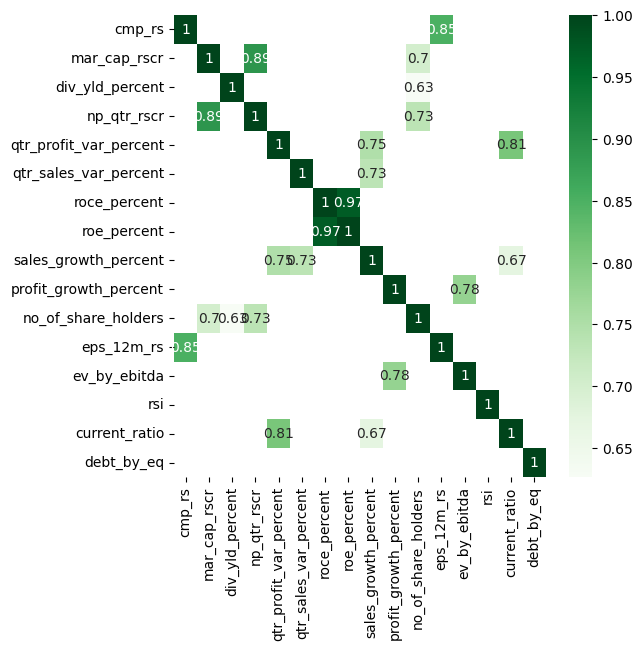

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# dataframe = d
matrix = da
# matrix = 

# plotting correlation matrix
plt.figure(figsize=(6,6))
sns.heatmap(matrix, cmap="Greens", annot=True)

In [149]:
import pandas as pd

df=pd.DataFrame(li,columns=col)
'''
ROE > 15 
ROCE > 15 
EPS > 10 
Sales growth > 10 
Profit growth > 10 
EVEBITDA < 10 
Dividend yield > 1 
RSI < 60 AND
Market Capitalization > 1000
'''
# df[(df['roe_percent']>15) & 
#    (df['roce_percent']>15) &
#    (df['eps_12m_rs']>10) &
#    (df['ev_by_ebitda']>10) &
#    (df['div_yld_percent']>1) &
#    (df['rsi']<70) &
#    (df['mar_cap_rscr']>1000) &
#    (df['sales_growth_percent']>10) & 
#    (df['profit_growth_percent']>10)]


high_quality = df[(df['roe_percent']>15) & 
   (df['roce_percent']>15) &
   (df['eps_12m_rs']>10) &
   (df['ev_by_ebitda']>10) &
   (df['div_yld_percent']>1) &
   (df['rsi']<70) &
   (df['mar_cap_rscr']>1000)]


high_quality

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
9,10,Hind. Unilever,2350.20,552200.94,1.78,2989.00,2.93,1.61,27.24,20.24,1.23,0.40,1218001.00,45.72,34.73,69.19,1.64,0.03
10,11,LTIMindtree,4116.75,121973.33,1.58,1086.70,-7.14,7.15,31.17,25.03,5.14,-0.56,440977.00,154.29,16.52,40.43,3.47,0.11
11,12,L&T Technology,4145.70,43894.54,1.22,300.80,-6.29,12.29,33.40,25.79,10.07,-1.28,231067.00,116.77,21.33,40.75,2.64,0.12
12,13,TCS,3230.30,1168750.78,1.70,12293.00,-1.69,5.29,64.67,52.42,5.99,4.20,2075117.00,134.20,16.29,29.71,2.32,0.10
22,23,ITC,422.40,528596.41,3.24,5013.18,-8.40,9.28,37.47,28.43,7.73,-2.09,3647886.00,16.12,18.11,65.10,3.05,0.00
24,25,Infosys,1383.50,574603.99,2.74,6822.00,11.46,7.58,39.99,31.83,4.44,13.36,2542766.00,66.60,12.94,29.68,2.13,0.09


### Undervalued stocks

In [110]:
# df[['name','roe_percent']]

In [111]:
'''
    ROE > 15
    DEBT-BY-EQ < 0.5
    CURRENT-RATIO > 2
'''

under_value = df[(df['roe_percent']>15) &
   (df['debt_by_eq']<0.5) &
   (df['current_ratio']>2)]
under_value

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
0,1,MRP Agro,132.00,146.63,0.00,2.26,769.23,219.86,39.18,30.31,140.56,590.00,591.00,6.21,13.21,49.40,13.63,0.00
6,7,P N Gadgil Jewe.,543.35,7373.69,0.00,85.23,49.32,24.13,30.82,32.39,37.78,178.88,201809.00,16.25,20.98,54.66,2.14,0.16
10,11,LTIMindtree,4116.75,121973.33,1.58,1086.70,-7.14,7.15,31.17,25.03,5.14,-0.56,440977.00,154.29,16.52,40.43,3.47,0.11
11,12,L&T Technology,4145.70,43894.54,1.22,300.80,-6.29,12.29,33.40,25.79,10.07,-1.28,231067.00,116.77,21.33,40.75,2.64,0.12
12,13,TCS,3230.30,1168750.78,1.70,12293.00,-1.69,5.29,64.67,52.42,5.99,4.20,2075117.00,134.20,16.29,29.71,2.32,0.10
17,18,Envirotech,105.00,197.30,0.00,2.83,24.12,-12.83,74.01,87.15,64.98,344.75,947.00,8.54,11.67,51.92,4.51,0.30
18,19,Menon Pistons,55.54,283.27,1.79,5.82,33.79,6.57,25.20,20.59,-0.04,8.75,29646.00,5.26,6.04,55.20,2.48,0.11
22,23,ITC,422.40,528596.41,3.24,5013.18,-8.40,9.28,37.47,28.43,7.73,-2.09,3647886.00,16.12,18.11,65.10,3.05,0.00
24,25,Infosys,1383.50,574603.99,2.74,6822.00,11.46,7.58,39.99,31.83,4.44,13.36,2542766.00,66.60,12.94,29.68,2.13,0.09


### High quality & undervalued stocks

In [ ]:
high_undervalued = pd.merge(high_quality,under_value,how='inner',on='name')
high_undervalued

,idx,name,cmp_rsx,mar_cap_rscrx,div_yld_percentx,np_qtr_rscrx,qtr_profit_var_percentx,qtr_sales_var_percentx,roce_percentx,roe_percentx,...,roce_percenty,roe_percenty,sales_growth_percenty,profit_growth_percenty,no_of_share_holdersy,eps_12m_rsy,ev_by_ebitday,rsiy,current_ratioy,debt_by_eqy
0,11,LTIMindtree,4116.75,121973.33,1.58,1086.70,-7.14,7.15,31.17,25.03,...,31.17,25.03,5.14,-0.56,440977.00,154.29,16.52,40.43,3.47,0.11
1,12,L&T Technology,4145.70,43894.54,1.22,300.80,-6.29,12.29,33.40,25.79,...,33.40,25.79,10.07,-1.28,231067.00,116.77,21.33,40.75,2.64,0.12
2,13,TCS,3230.30,1168750.78,1.70,12293.00,-1.69,5.29,64.67,52.42,...,64.67,52.42,5.99,4.20,2075117.00,134.20,16.29,29.71,2.32,0.10
3,23,ITC,422.40,528596.41,3.24,5013.18,-8.40,9.28,37.47,28.43,...,37.47,28.43,7.73,-2.09,3647886.00,16.12,18.11,65.10,3.05,0.00
4,25,Infosys,1383.50,574603.99,2.74,6822.00,11.46,7.58,39.99,31.83,...,39.99,31.83,4.44,13.36,2542766.00,66.60,12.94,29.68,2.13,0.09


In [1]:
# df['roe_percent'].max()
# df['name'].tolist()
df.describe()

NameError: name 'df' is not defined

In [52]:
filtered_stocks = df[(df['roe_percent'] > 15) & (df['ev_by_ebitda'] < 10)]
print("Filtered Stocks Summary Table")
print(filtered_stocks[['cmp_rs', 'roe_percent', 'eps_12m_rs', 'ev_by_ebitda']])

Filtered Stocks Summary Table
    cmp_rs roe_percent eps_12m_rs ev_by_ebitda
14  240.20       16.26      31.01         4.38
15  133.15       25.66       7.52         9.07
16  388.15       24.19      37.13         6.07
18   55.54       20.59       5.26         6.04
20  390.75       52.04      55.88         3.95


In [55]:
top_roe = df.nlargest('roe_percent')
plt.figure(figsize=(10, 6))
plt.barh(top_roe['cmp_rs'], top_roe['roe_percent'], color='green')
plt.xlabel("ROE (%)")
plt.title("Top 10 Stocks by ROE")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

TypeError: DataFrame.nlargest() missing 1 required positional argument: 'columns'

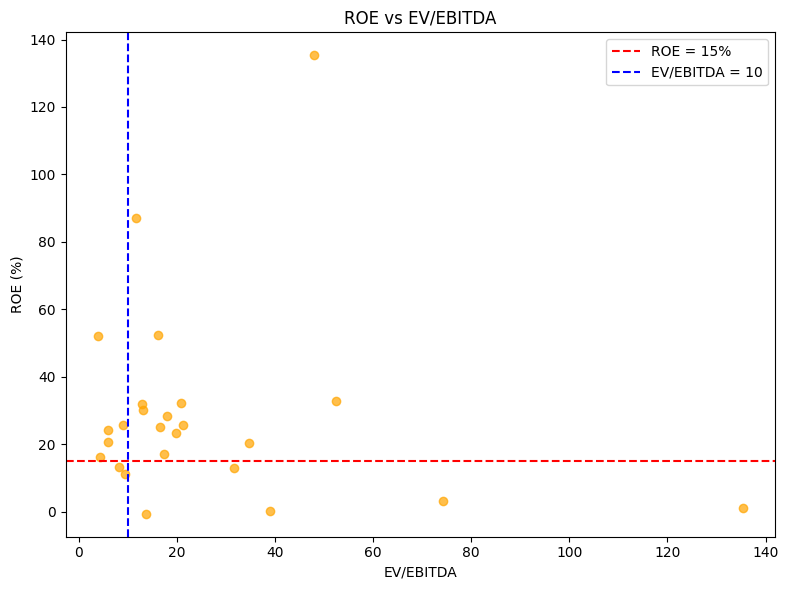

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(df['ev_by_ebitda'], df['roe_percent'], alpha=0.7, color='orange')
plt.xlabel("EV/EBITDA")
plt.ylabel("ROE (%)")
plt.title("ROE vs EV/EBITDA")
plt.axhline(15, color='red', linestyle='--', label='ROE = 15%')
plt.axvline(10, color='blue', linestyle='--', label='EV/EBITDA = 10')
plt.legend()
plt.tight_layout()
plt.show()


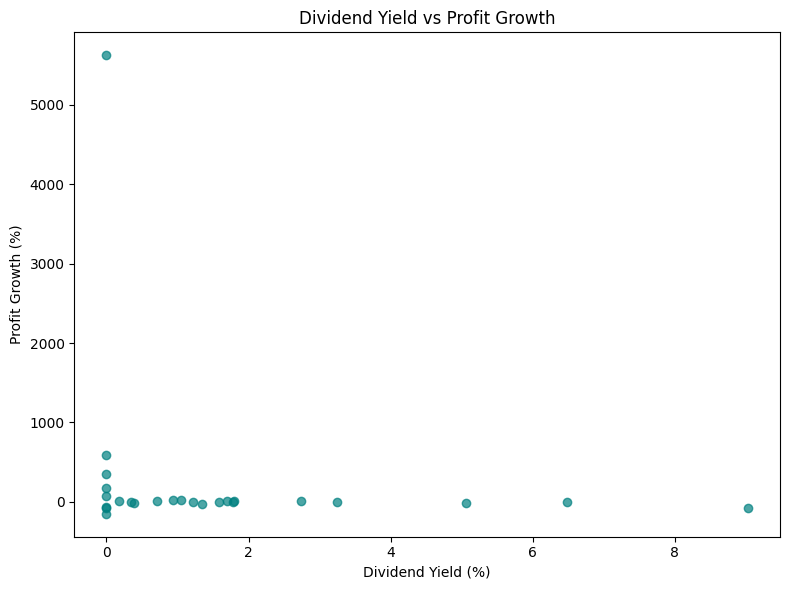

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(df['div_yld_percent'], df['profit_growth_percent'], alpha=0.7, color='teal')
plt.xlabel("Dividend Yield (%)")
plt.ylabel("Profit Growth (%)")
plt.title("Dividend Yield vs Profit Growth")
plt.tight_layout()
plt.show()


In [61]:
print("\nKPI Summary:")
print(f"Total Companies: {len(df)}")
print(f"Filtered Companies: {len(filtered_stocks)}")
print(f"Average ROE: {df['roe_percent'].mean():.2f}%")
print(f"Average Dividend Yield: {df['div_yld_percent'].mean():.2f}%")
print(f"Average EV/EBITDA: {df['ev_by_ebitda'].mean():.2f}")


KPI Summary:
Total Companies: 25
Filtered Companies: 5
Average ROE: 28.89%
Average Dividend Yield: 1.58%
Average EV/EBITDA: 25.80


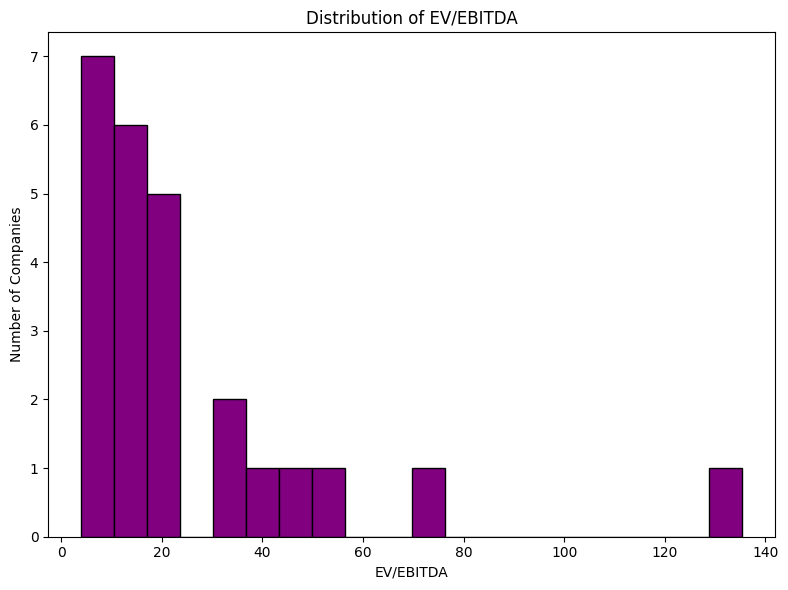

In [58]:
plt.figure(figsize=(8, 6))
plt.hist(df['ev_by_ebitda'].dropna(), bins=20, color='purple', edgecolor='black')
plt.title("Distribution of EV/EBITDA")
plt.xlabel("EV/EBITDA")
plt.ylabel("Number of Companies")
plt.tight_layout()
plt.show()

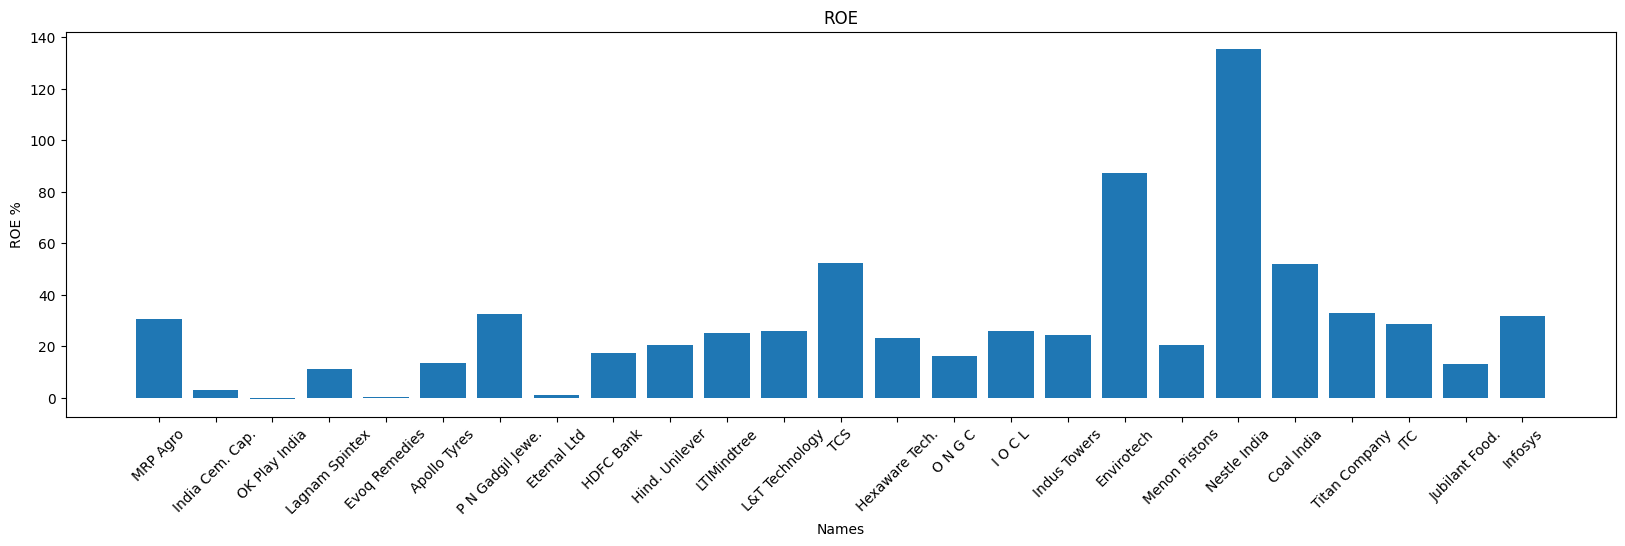

In [56]:
import matplotlib.pyplot as plt

x = df['name'].tolist()
y = df['roe_percent'].tolist()


plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.title('ROE')
plt.xlabel('Names')
plt.xticks(rotation=45)
plt.ylabel('ROE %')
plt.show()

In [57]:
import matplotlib.pyplot as plt

x = high_quality['name'].tolist()
y = high_quality['roe_percent'].tolist()


plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.title('ROE')
plt.xlabel('Names')
plt.ylabel('ROE %')
plt.show()

NameError: name 'high_quality' is not defined

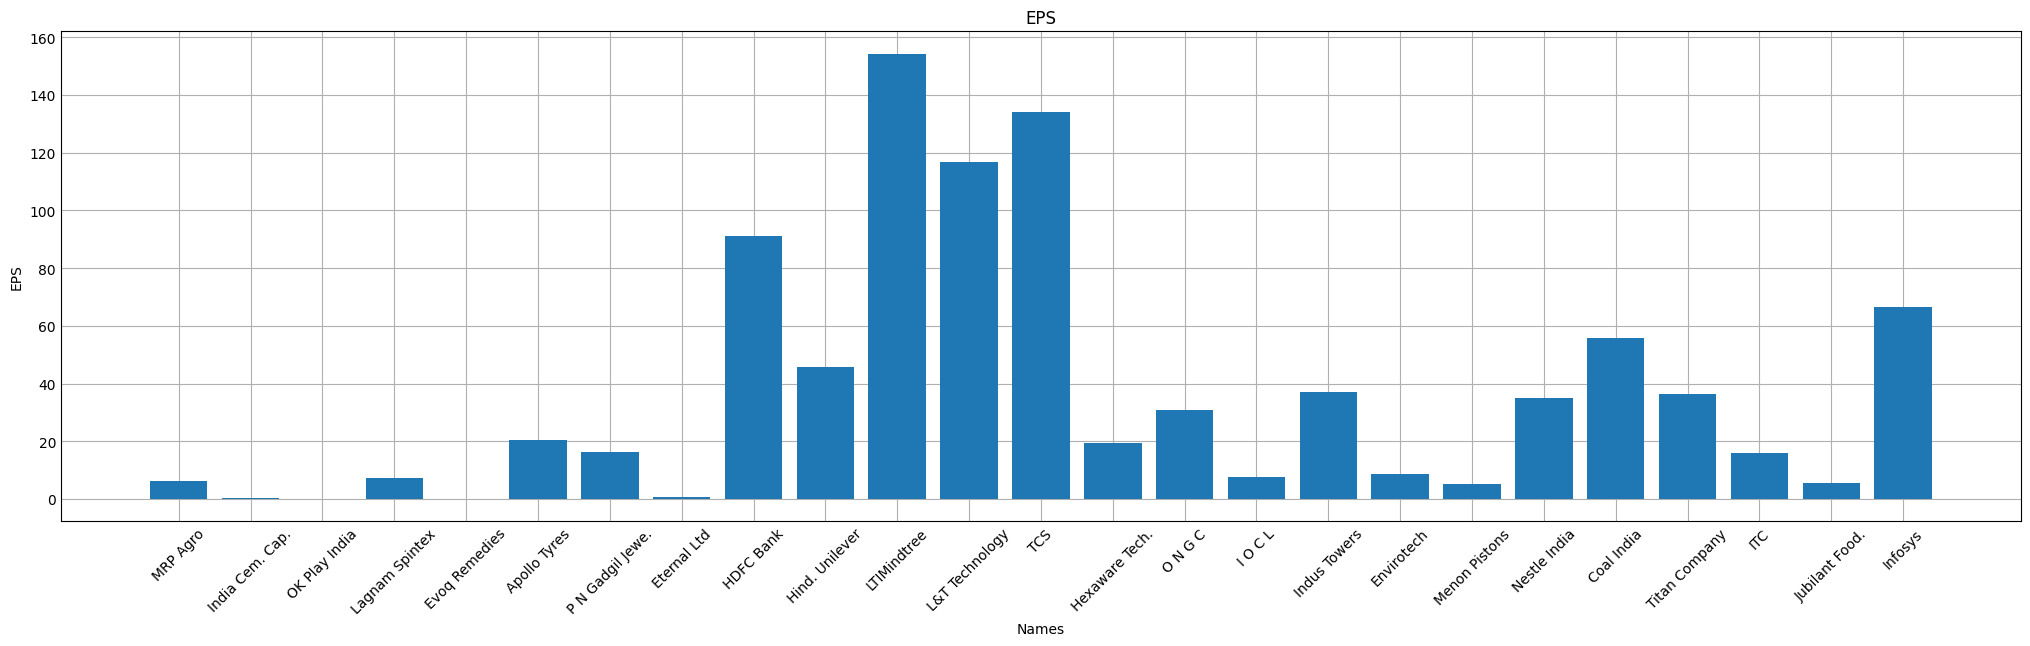

In [ ]:
import matplotlib.pyplot as plt

x = df['name'].tolist()
y = df['eps_12m_rs'].tolist()


plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.title('EPS')
plt.xlabel('Names')
plt.xticks(rotation=45)
plt.ylabel('EPS')
plt.show()

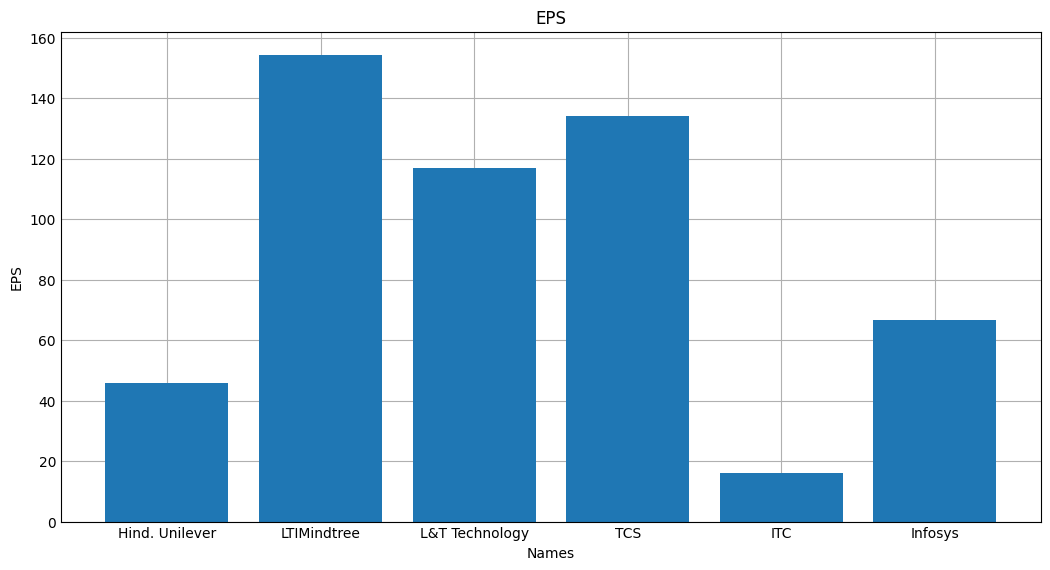

In [ ]:
import matplotlib.pyplot as plt

x = high_quality['name'].tolist()
y = high_quality['eps_12m_rs'].tolist()

plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.title('EPS')
plt.xlabel('Names')
plt.ylabel('EPS')
plt.show()

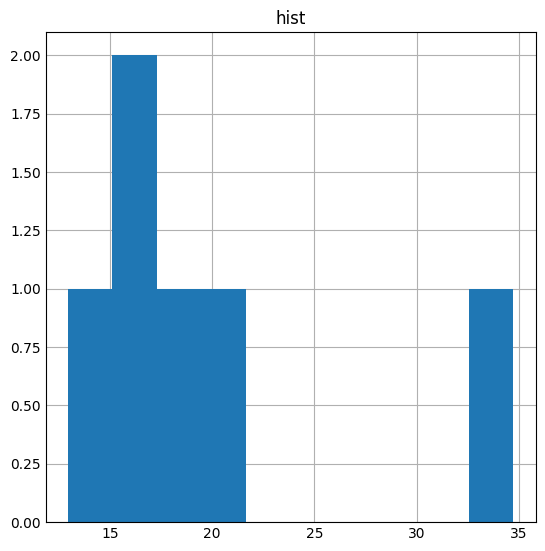

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = high_quality['ev_by_ebitda'].tolist()

plt.figure(figsize=(5,5))
plt.hist(x)
plt.title('hist')
plt.show()

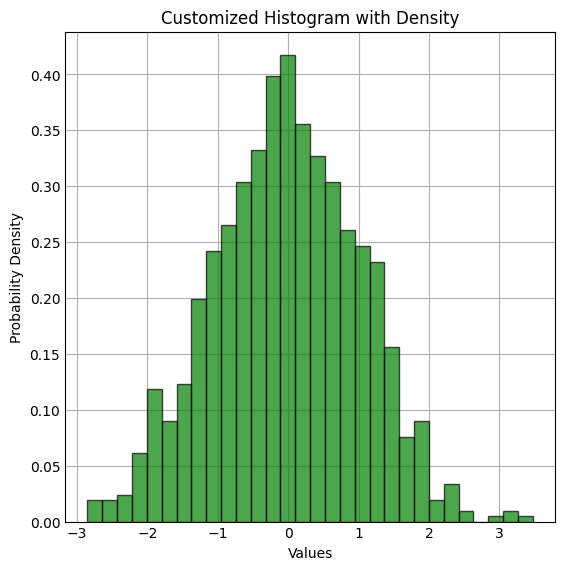

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
data = np.random.randn(1000)

# Create a histogram with density and custom color
plt.figure(figsize=(5,5))
plt.hist(data, bins=30, density=True, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Customized Histogram with Density')
plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# plt.imshow(np.random.random((50,50)))
# plt.colorbar()
# plt.show()

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [ ]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
data 
cols = [col.replace(" ",'_') for col,_ in data.items()]
cols = [col.replace('%','PERCENT') for col in cols]
cols = [col.replace('.','') for col in cols]
cols = [col.replace('/','BY') for col in cols]
rows = [v for k,v in data.items()]
# print(len(cols),len(rows))
# print(cols)
    # print(rows)
company_name = rows[0]
# if 
row_data = []
li =[]
for row in range(len(rows)):
    for col in range(len(rows[row])):
        for r in range(len(rows)):
            if rows[r][col] == '':
                li.append('NULL')
                continue
            li.append(rows[r][col])
        row_data.append(li)
        li=[]
    break
print(row_data)

[['ITC Hotels', '199.25', '41467.40', '0.00', '0.74', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', '2596732.00', 'NULL', 'NULL', 'NULL', '54.18'], ['ITC', '420.05', '525655.64', '3.26', '5013.18', '-8.40', '9.28', '37.47', '75160.56', '28.43', '7.73', '-2.09', '3710169.00', '12.89', '16.12', '18.01', '58.08'], ['Jubilant Food.', '688.00', '45397.31', '0.18', '43.24', '-21.97', '56.06', '11.20', '7611.34', '12.98', '42.24', '4.08', '363143.00', '19.52', '5.61', '31.32', '57.96'], ['Vedanta', '384.00', '150158.96', '11.34', '4876.00', '76.20', '10.06', '20.91', '148022.00', '10.49', '1.28', '138.51', '1999975.00', '17.76', '33.58', '5.08', '26.48'], ['Infosys', '1423.05', '591030.16', '2.66', '6822.00', '11.46', '7.58', '39.99', '159988.00', '31.83', '4.44', '13.36', '2542766.00', '15.22', '66.60', '13.32', '26.53']]


In [ ]:
cols = [col.replace(" ",'_') for col,_ in data.items()]
cols = [col.replace('%','PERCENT') for col in cols]
cols = [col.replace('.','') for col in cols]
cols = [col.replace('/','BY') for col in cols]
for i in cols:
    print(f'{i} numeric,')

Name numeric,
CMP_Rs numeric,
Mar_Cap_RsCr numeric,
Div_Yld_PERCENT numeric,
NP_Qtr_RsCr numeric,
Qtr_Profit_Var_PERCENT numeric,
Qtr_Sales_Var_PERCENT numeric,
ROCE_PERCENT numeric,
ROE_PERCENT numeric,
Sales_growth_PERCENT numeric,
Profit_growth_PERCENT numeric,
No_of_Share_Holders numeric,
EPS_12M_Rs numeric,
EV_BY_EBITDA numeric,
RSI numeric,
Current_ratio numeric,
Debt_BY_Eq numeric,


In [ ]:
for i,j in data.items():
    print(i,j)

Name ['Infosys', 'Vedanta']
CMP Rs. [1403.7, 370.55]
Mar Cap Rs.Cr. [582993.59, 144899.43]
Div Yld % [2.71, 11.74]
NP Qtr Rs.Cr. [6822.0, 4876.0]
Qtr Profit Var % [11.46, 76.2]
Qtr Sales Var % [7.58, 10.06]
ROCE % [39.99, 20.91]
Sales Rs.Cr. [159988.0, 148022.0]
ROE % [31.83, 10.49]
Sales growth % [4.44, 1.28]
Profit growth % [13.36, 138.51]
No. of Share Holders [2542766.0, 1999975.0]
Sales Var 3Yrs % [15.22, 17.76]
EPS 12M Rs. [66.6, 33.58]
EV / EBITDA [13.13, 4.95]
RSI [26.53, 26.48]


In [ ]:
dat = {'Name': []}
for i in range(3):
    dat['Name'].append(i)
print(dat)

{'Name': [0, 1, 2]}


# One single row

In [ ]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys # to use enter 
import time
import pandas as pd
import numpy as np

username = "melibi8600@exclussi.com"
password = "screener@12345"

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
# driver.maximize_window()    # to maximize the web page
driver.get('https://www.screener.in/')

driver.find_element(By.XPATH,"/html/body/nav/div[2]/div/div/div/div[2]/div[2]/a[1]").click()
driver.find_element(By.NAME,"username").send_keys(username)
time.sleep(2)
driver.find_element(By.NAME,"password").send_keys(password)
time.sleep(1)
driver.find_element(By.XPATH,"/html/body/main/div[2]/div[2]/form/button").click()
time.sleep(3)
driver.find_element(By.XPATH,"/html/body/div/div[2]/main/div[1]/div[2]/a[1]").click()

li_d=[]
data = {}

for i in range(2,19):
    head = driver.find_element(By.XPATH,f'/html/body/main/div[3]/div[3]/table/tbody/tr[1]/th[{i}]').text 
    if i >= 2: 
        value=driver.find_element(By.XPATH,f'/html/body/main/div[3]/div[3]/table/tbody/tr[2]/td[{i+1}]').text
        if value.isalpha():
            pass
        else:
            value=float(value)
    data[head]=value
    head,value='',''
    
# data.append(data)
df = pd.DataFrame(data,index=[1])
print(df)
# print(data)
# df.to_csv('stock.csv',index=False)
time.sleep(5)
driver.close()

      Name  CMP Rs.  Mar Cap Rs.Cr.  Div Yld %  NP Qtr Rs.Cr.  \
1  Infosys   1403.7       582993.59       2.71         6822.0   

   Qtr Profit Var %  Qtr Sales Var %  ROCE %  Sales Rs.Cr.  ROE %  \
1             11.46             7.58   39.99      159988.0  31.83   

   Sales growth %  Profit growth %  No. of Share Holders  Sales Var 3Yrs %  \
1            4.44            13.36             2542766.0             15.22   

   EPS 12M Rs.  EV / EBITDA    RSI  
1         66.6        13.13  26.53  


In [ ]:
import psycopg2

conn = None
cur = None

try:
    conn = psycopg2.connect(host='localhost', dbname='postgres',user='postgres',password="mypass",port=5431)
    cur = conn.cursor()
    cols = [col.replace(" ",'_') for col,_ in data.items()]
    cols = [col.replace('%','PERCENT') for col in cols]
    cols = [col.replace('.','') for col in cols]
    cols = [col.replace('/','BY') for col in cols]
    rows = [v for k,v in data.items()]
    print(len(cols),len(rows))
    print(cols)
    print(rows)
    # ind = []


    cur.execute(f"""
                insert into stocks ({', '.join(cols)})
                values ({', '.join(['%s'] * len(cols))})
            """,rows)
    print("done")
    conn.commit()
    print('Inserted into stocks')
except Exception as e:
    print(e)
finally:
    if cur is not None:
        cur.close()
    if conn is not None:
        conn.close()

17 17
['Name', 'CMP_Rs', 'Mar_Cap_RsCr', 'Div_Yld_PERCENT', 'NP_Qtr_RsCr', 'Qtr_Profit_Var_PERCENT', 'Qtr_Sales_Var_PERCENT', 'ROCE_PERCENT', 'Sales_RsCr', 'ROE_PERCENT', 'Sales_growth_PERCENT', 'Profit_growth_PERCENT', 'No_of_Share_Holders', 'Sales_Var_3Yrs_PERCENT', 'EPS_12M_Rs', 'EV_BY_EBITDA', 'RSI']
['Infosys', 1403.7, 582993.59, 2.71, 6822.0, 11.46, 7.58, 39.99, 159988.0, 31.83, 4.44, 13.36, 2542766.0, 15.22, 66.6, 13.13, 26.53]
done
Inserted into stocks


In [ ]:
data

{'Name': 'Vedanta',
 'CMP Rs.': 370.5,
 'Mar Cap Rs.Cr.': 144879.88,
 'Div Yld %': 11.8,
 'NP Qtr Rs.Cr.': 4876.0,
 'Qtr Profit Var %': 76.2,
 'Qtr Sales Var %': 10.06,
 'ROCE %': 20.91,
 'Sales Rs.Cr.': 148022.0,
 'ROE %': 10.49,
 'Sales growth %': 1.28,
 'Profit growth %': 138.51,
 'No. of Share Holders': 1999975.0,
 'Sales Var 3Yrs %': 17.76,
 'EPS 12M Rs.': 33.58,
 'EV / EBITDA': 4.95,
 'RSI': 27.58}

In [ ]:
cols = [col for col,_ in data.items()]
rows = [v for k,v in data.items()]
print(len(cols),len(rows))

17 17


In [ ]:
z = ["Name","id"]
z

['Name', 'id']

In [ ]:
# df['sp']=df['Sales Rs.Cr.']*df['Profit growth %']
# df.info()
df.drop(['sp'],axis=1)

,Name,CMP Rs.,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Qtr Sales Var %,ROCE %,Sales Rs.Cr.,ROE %,Sales growth %,Profit growth %,No. of Share Holders,Sales Var 3Yrs %,EPS 12M Rs.,EV / EBITDA,RSI
1,Vedanta,370.5,144879.88,11.8,4876.0,76.2,10.06,20.91,148022.0,10.49,1.28,138.51,1999975.0,17.76,33.58,4.95,27.58


In [ ]:
d = {'Name': 'Vedanta', 'CMP Rs.': '370.75', 'Mar Cap Rs.Cr.': '144977.65', 'Div Yld %': '11.80', 'NP Qtr Rs.Cr.': '4876.00', 'Qtr Profit Var %': '76.20', 'Qtr Sales Var %': '10.06', 'ROCE %': '20.91', 'Sales Rs.Cr.': '148022.00', 'ROE %': '10.49', 'Sales growth %': '1.28', 'Profit growth %': '138.51', 'No. of Share Holders': '1999975.00', 'Sales Var 3Yrs %': '17.76', 'EPS 12M Rs.': '33.58', 'EV / EBITDA': '4.96', 'RSI': '27.58'}
for k,v in d.items():
    print(f'"{k}" float,')

In [ ]:
for i in cols:
    print(f"{i} float,")

Name float,
CMP_Rs float,
Mar_Cap_RsCr float,
Div_Yld_PERCENT float,
NP_Qtr_RsCr float,
Qtr_Profit_Var_PERCENT float,
Qtr_Sales_Var_PERCENT float,
ROCE_PERCENT float,
Sales_RsCr float,
ROE_PERCENT float,
Sales_growth_PERCENT float,
Profit_growth_PERCENT float,
No_of_Share_Holders float,
Sales_Var_3Yrs_PERCENT float,
EPS_12M_Rs float,
EV_BY_EBITDA float,
RSI float,


In [ ]:
'98'.isdigit()

True

In [ ]:
rows, cols = 3,6
my_matrix = [([0]*cols) for i in range(rows)]
my_matrix

[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]

### Code to automate YT shorts scrolling action

```python
# Automate scrolling action for YT shorts

from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys # to use enter 
import time

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
# driver.maximize_window()    # to maximize the web page
driver.get('https://www.youtube.com/shorts/jxHyGE_WuVM')
time.sleep(5)

# input = driver.find_element(By.XPATH,'/html/body/main/div[2]/div/div/div/input')
input = driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-shorts/div[3]/div[2]/ytd-reel-video-renderer[1]/div[1]/div[2]/div[1]/ytd-player/div/div/div[8]/button')
input.click()

for i in range(5):
    next=driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-shorts/div[5]/div[2]/ytd-button-renderer/yt-button-shape/button/yt-touch-feedback-shape/div/div[2]')
    next.click()
    time.sleep(5)


```